In [33]:
from servos import ServoSB
from links import MultiLink

class MeArm(object):
    def __init__(self):
        # TODO: complete the DH parameters
        self._L1 = 6.2 # Shoulder to elbow length (cm)
        self._L2 = 8.5 # Elbow to wrist length (cm)
        self._L3 = 8.5 # Wrist to hand length (cm)
        
        self._A1 = 60 # degrees 1st link (90)
        self._A2 = -20 # degrees 2nd link (90)
        self._A3 = -30 # degrees 3rd link (25)
        
        self.ERROR_THRESHOLD = 1 # Play with this to stop the loop
        
        # TODO: connect the servos to their pin and select the range of the angles
        DUMMY_VAL = 1,0,180 # Remove this!
        self.servos = {"base":ServoSB( *DUMMY_VAL ),
                      "shoulder":ServoSB( *DUMMY_VAL ),
                      "elbow":ServoSB( *DUMMY_VAL ),
                      "grip":ServoSB( *DUMMY_VAL )}

    def current_body(self):
        # TODO: change Multilink to accept DH specifications
        body = MultiLink()
        body.addLink(self._L1, self._A1)
        body.addLink(self._L2, self._A2)
        body.addLink(self._L3, self._A3)
        body.compose()
        return body

    def base(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving base to:", angle
        
    def shoulder(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving shoulder to:", angle        
    
    def elbow(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving elbow to:", angle
    
    def gripper(self, angle):
        #TODO: Move the servo to the desired angle
        print "Moving gripper to:", angle
    
    def openGripper(self):
        #TODO: Move the servo to the angle that opens the gripper
        print "Grip open"
    
    def closeGripper(self):
        #TODO: Move the servo to the angle that closes the gripper
        print "Grip close"
    
    def clap(self):
        self.openGripper(); self.closeGripper()
        self.openGripper(); self.closeGripper()
        self.openGripper()
    
    def plotLinks(self):
        self._body.plotLinks()
    
    def distance(self, p1, p2):
        # TODO: Calculate the distance between points p1 and p2
        pass
    
    def calculate_movement_delta(self, x, y, z):
        # TODO: Do something smart and calculate the angular delta, by using one of the
        # methods from the papers
        delta_A1, delta_A2, delta_A3 = 0, 0, 0
        return (delta_A1, delta_A2, delta_A3)
    
    def gotoPoint(self, x, y, z):
        #TODO: Implement using one of the methods from the paper
        print "Moving to:",(x,y,z)
        p2 = (x, y)  # I'm currently ignoring z and just assuming we're moving in a 2D plane
                     # This is obviously not enough, but should get the point accross
        p1 = arm.current_body().jointsToPosition()[:2]
        while( self.distance(p1, p2) > self.ERROR_THRESHOLD):
            delta_A1, delta_A2, delta_A3 = self.calculate_movement_delta(self, x, y, z)
            # Update angles
            self._A1 += delta_A1
            self._A2 += delta_A2
            self._A3 += delta_A3
            # Get updated position
            p1 = arm.current_body().jointsToPosition()[:2]
    
arm = MeArm()
arm.clap()
#Go up and left to grab something
arm.gotoPoint(-80,100,140); 
arm.closeGripper();
#Go down, forward and right to drop it
arm.gotoPoint(70,200,10);
arm.openGripper();
#Back to start position
arm.gotoPoint(0,100,50);

Grip open
Grip close
Grip open
Grip close
Grip open
Moving to: (-80, 100, 140)
Grip close
Moving to: (70, 200, 10)
Grip open
Moving to: (0, 100, 50)


Here's a bunch of useful commands you may find useful to debug this:

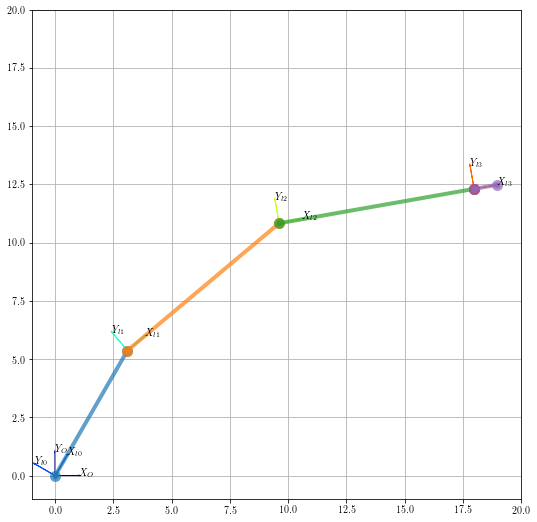

In [27]:
# To see how the MultiLink looks like in 2D
arm.current_body().plotLinks()

In [29]:
# If you want to get the point at the tip of the robot (Direct Kinematic)
arm.current_body().jointsToPosition()[:2]